In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split

Premier essai

In [31]:
np.random.seed(42) # Definition des variables 
n = 150
beta1 = 2
beta2_values = np.linspace(0, 0.16, 9)  # Values of beta2 to test
mse_a1 = []
mse_a2 = []
results = []

x = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 1, n)

for beta2 in beta2_values: # Premier essai
    y = beta1 * x + beta2 * x**2 + epsilon
    
    x_reshape = x.reshape(-1, 1)
    
    # Model a1: simple linear regression (y ~ x)
    model_a1 = LinearRegression().fit(x_reshape, y)
    y_pred_a1 = model_a1.predict(x_reshape)
    mse_a1.append(mean_squared_error(y, y_pred_a1))
    coef_a1 = (model_a1.intercept_, model_a1.coef_[0])
    
    # Model a2: quadratic regression (y ~ x + x^2)
    x_quad = np.column_stack((x, x**2))
    model_a2 = LinearRegression().fit(x_quad, y)
    y_pred_a2 = model_a2.predict(x_quad)
    mse_a2.append(mean_squared_error(y, y_pred_a2))
    coef_a2 = (model_a2.intercept_, model_a2.coef_[0], model_a2.coef_[1])

    results.append({
        'beta2': beta2,
        'coef_a1_intercept': coef_a1[0],
        'coef_a1_x': coef_a1[1],
        'mse_a1': mean_squared_error(y, y_pred_a1),
        'coef_a2_intercept': coef_a2[0],
        'coef_a2_x': coef_a2[1],
        'coef_a2_x2': coef_a2[2],
        'mse_a2': mean_squared_error(y, y_pred_a2)
    })

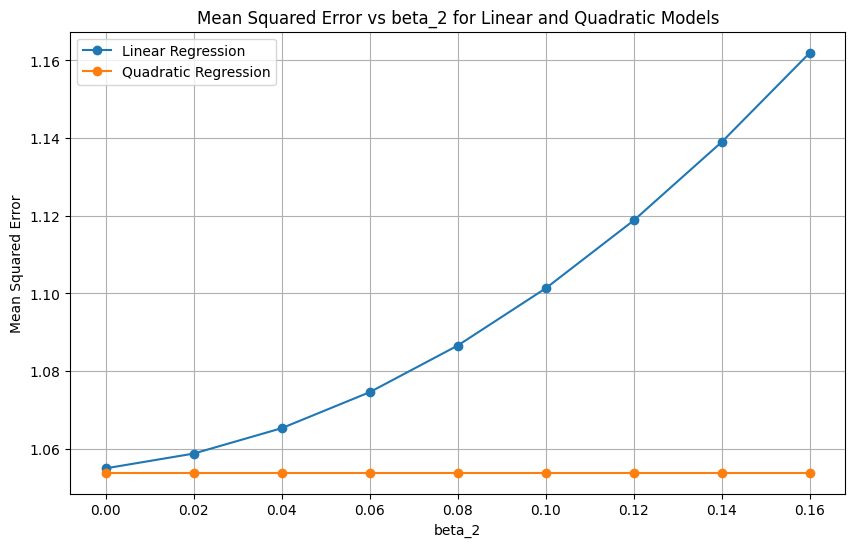

In [32]:

plt.figure(figsize=(10, 6))
plt.plot(beta2_values, mse_a1, label='Linear Regression', marker='o')
plt.plot(beta2_values, mse_a2, label='Quadratic Regression', marker='o')
plt.xlabel(r'beta_2')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs beta_2 for Linear and Quadratic Models')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
df_results = pd.DataFrame(results)
df_results

,beta2,coef_a1_intercept,coef_a1_x,mse_a1,coef_a2_intercept,coef_a2_x,coef_a2_x2,mse_a2
0,0.00,-0.035853,2.034981,1.054958,0.033616,1.947102,0.017792,1.053876
1,0.02,-0.113943,2.133767,1.058761,0.033616,1.947102,0.037792,1.053876
2,0.04,-0.192034,2.232554,1.065299,0.033616,1.947102,0.057792,1.053876
3,0.06,-0.270124,2.331340,1.074574,0.033616,1.947102,0.077792,1.053876
4,0.08,-0.348214,2.430126,1.086585,0.033616,1.947102,0.097792,1.053876
5,0.10,-0.426304,2.528912,1.101333,0.033616,1.947102,0.117792,1.053876
6,0.12,-0.504394,2.627698,1.118816,0.033616,1.947102,0.137792,1.053876
7,0.14,-0.582484,2.726484,1.139036,0.033616,1.947102,0.157792,1.053876
8,0.16,-0.660575,2.825270,1.161992,0.033616,1.947102,0.177792,1.053876


In [148]:
def calcul_t_stat(n,B,m):
        
   np.random.seed(42)
   esperances = []
   variances = []
   test_statistics = []
   test_alternative = []
   power = []
   epsilon = np.random.normal(0, 1, n + m)
   x = np.random.uniform(0, 5, n + m)
   beta1 = 2
   beta2_values = np.linspace(0, 0.16, 9)

   bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping

   for beta2 in beta2_values:
       
       db = []
       
       for bootstrap_index in bootstrap_indices:
       
          y = beta1 * x + beta2 * x**2 + epsilon # generation de données

          x_train = x[bootstrap_index]
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]

          x_test = x[n:n+m]
          y_test = y[n:n+m]

          x_train_reshape = x_train.reshape(-1, 1) # fit pour le modèle 
          model_a1 = LinearRegression().fit(x_train_reshape, y_train) # Modèle linéaire
          y_pred_a1 = model_a1.predict(x_test.reshape(-1,1))
          p1b = mean_squared_error(y_test, y_pred_a1)

          x_train_quad = np.column_stack((x_train, x_train**2))
          model_a2 = LinearRegression().fit(x_train_quad, y_train)
          x_test_quad = np.column_stack((x_test, x_test**2))
          y_pred_a2 = model_a2.predict(x_test_quad)
          p2b = mean_squared_error(y_test, y_pred_a2)

          db.append(p1b - p2b)  # Différence des moyennes de performance sur chaque bootstrap

       # Fin du boostrapping

       d_barre = sum(db)/B # Converge p.s vers l'espérance mu

       var = np.var(db, ddof=1)
       test_stat = (B**0.5)*d_barre/np.sqrt(var) # Statistique pour l'hypothèse nulle

       delta = 0.01
       student = stats.t.ppf(0.95, df=B-1)
       mu = (B ** 0.5)*delta/np.sqrt(var)
       test_alt = student - mu
       puissance = 1 - stats.norm.cdf(student - mu, delta, var)
       
       esperances.append(d_barre)
       variances.append(var)
       test_statistics.append(test_stat)
       test_alternative.append(test_alt)
       power.append(puissance)

   return esperances, variances, test_statistics, test_alternative, power


In [128]:
from sklearn.model_selection import GridSearchCV

# On cherche le meilleur B

In [138]:
param_grid = {'n_bootstrap': [2, 10, 50, 100, 200, 500]}

def evaluate_model_with_bootstrap(n, n_bootstrap, m):
    esperances, variances, test_statistics, test_alternative, power = calcul_t_stat(n, n_bootstrap, m)
    return np.mean(power)


In [140]:
best_score = +np.inf
best_params = None
for n_bootstrap in param_grid['n_bootstrap']:
    score = evaluate_model_with_bootstrap(150, n_bootstrap,2000)
    if score < best_score:
        best_score = score      
        best_params = n_bootstrap

print(f'Best number of bootstraps: {best_params}, with score: {best_score}')

Best number of bootstraps: 2, with score: 1.0


In [149]:
esperances, variances, test_statistics, test_alternative, power = calcul_t_stat(150,10,150)

Premières statistiques descriptives

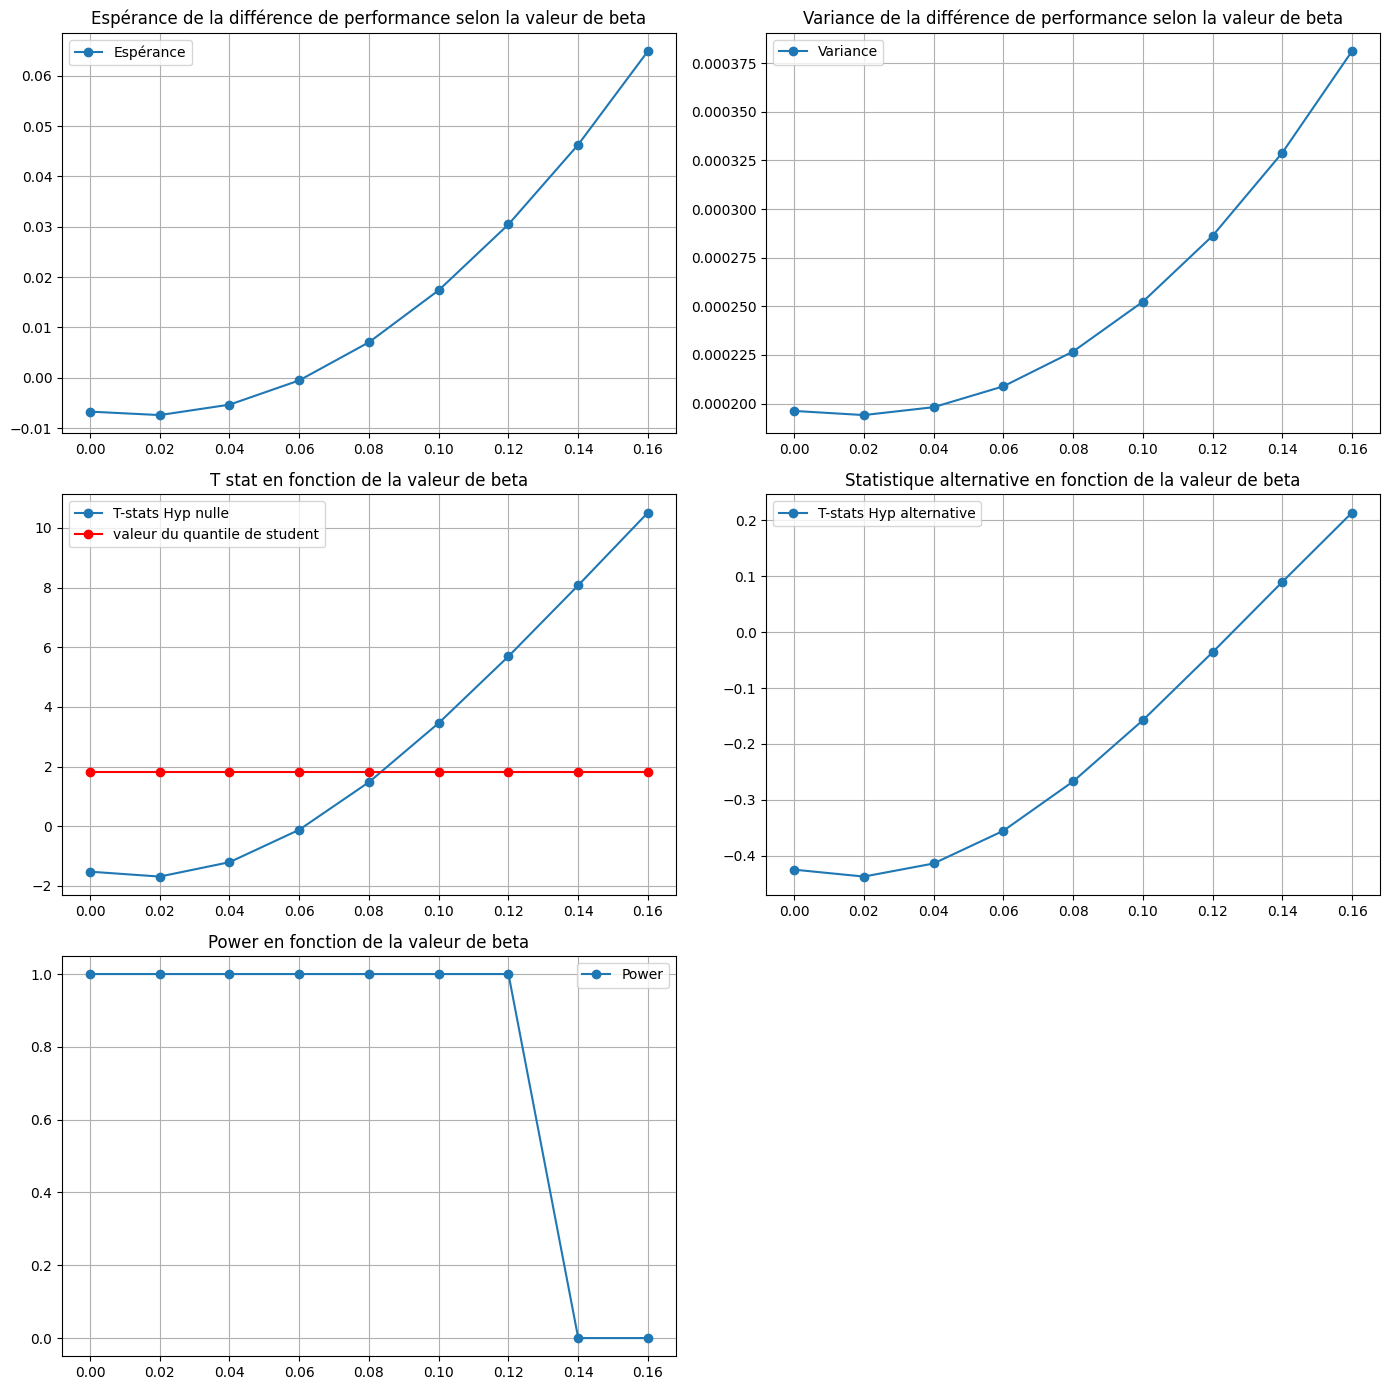

In [150]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

# Premier sous-graphe : Espérance
axes[0, 0].plot(beta2_values, esperances, label='Espérance', marker='o')
axes[0, 0].set_title('Espérance de la différence de performance selon la valeur de beta')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Deuxième sous-graphe : Variance
axes[0, 1].plot(beta2_values, variances, label='Variance', marker='o')
axes[0, 1].set_title('Variance de la différence de performance selon la valeur de beta')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Troisième sous-graphe : T-stat Hyp nulle
axes[1, 0].plot(beta2_values, test_statistics, label='T-stats Hyp nulle', marker='o')
axes[1, 0].plot(beta2_values, [stats.t.ppf(0.95, df=9)]*len(beta2_values), label='valeur du quantile de student', color='r', marker='o')
axes[1, 0].set_title('T stat en fonction de la valeur de beta')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Quatrième sous-graphe : T-stat Hyp alternative
axes[1, 1].plot(beta2_values, test_alternative, label='T-stats Hyp alternative', marker='o')
axes[1, 1].set_title('Statistique alternative en fonction de la valeur de beta')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Cinquième sous-graphe : Power
axes[2, 0].plot(beta2_values, power, label='Power', marker='o')
axes[2, 0].set_title('Power en fonction de la valeur de beta')
axes[2, 0].legend()
axes[2, 0].grid(True)

# Cache le 6ème sous-graphe vide
fig.delaxes(axes[2, 1])

# Ajuste la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()


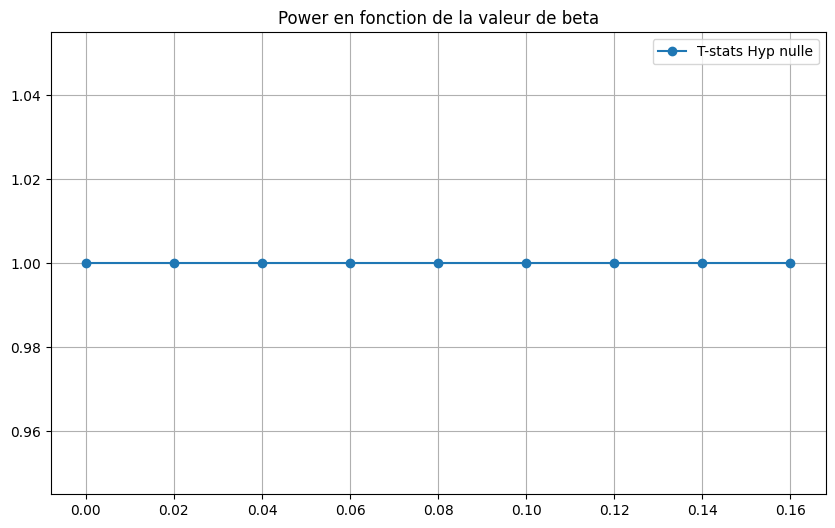

In [ ]:
"""
   y = beta1 * x + beta2 * x**2 + epsilon # generation de données

          x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=m, random_state=42)

          x_train_reshape = x_train.reshape(-1, 1) # fit pour le modèle 
          model_a1 = LinearRegression().fit(x_train_reshape, y_train) # Modèle linéaire
          y_pred_a1 = model_a1.predict(x_test.reshape(-1,1))
          p1b = mean_squared_error(y_test, y_pred_a1)

          x_train_quad = np.column_stack((x_train, x_train**2))
          model_a2 = LinearRegression().fit(x_train_quad, y_train)
          x_test_quad = np.column_stack((x_test, x_test**2))
          y_pred_a2 = model_a2.predict(x_test_quad)
          p2b = mean_squared_error(y_test, y_pred_a2)
          
"""